In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df  = yf.download("AMZN", start='2010-01-01', end='2023-01-09')

df.reset_index(drop=True, inplace=True)

df.head()

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
1,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
3,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
4,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
3271,83.120003,84.050003,82.470001,84.000000,84.000000,62330000
3272,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
3273,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
3274,85.330002,85.419998,83.070000,83.120003,83.120003,67930800


In [2]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [3]:
df = df.astype('float64')

In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 1600x800 with 0 Axes>

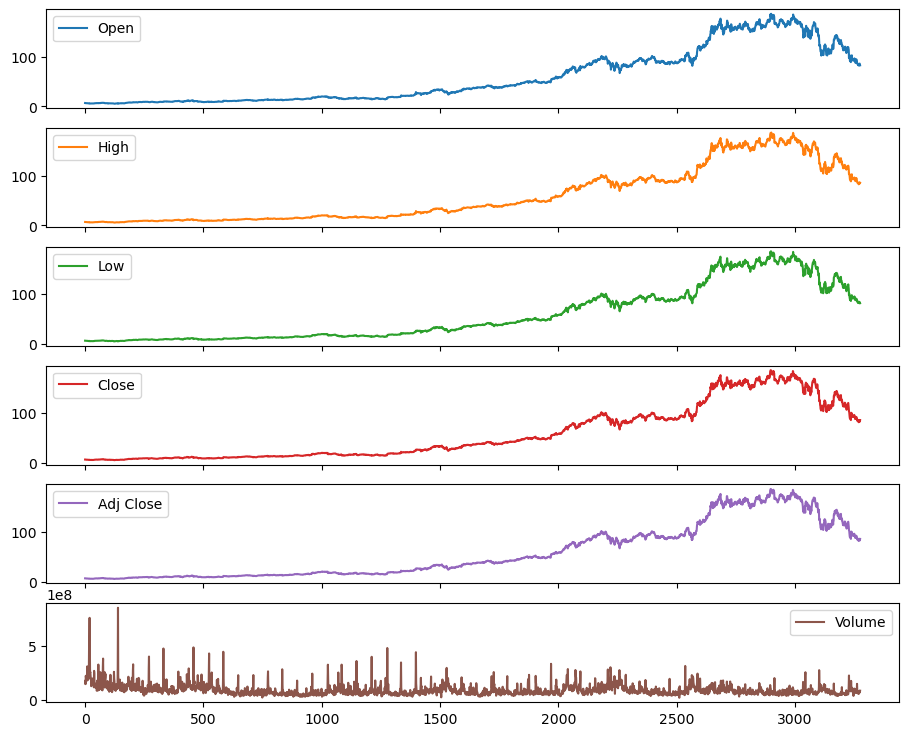

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8)) # resizing the plot
axes = df.plot(figsize=(11, 9), subplots = True)
plt.show();

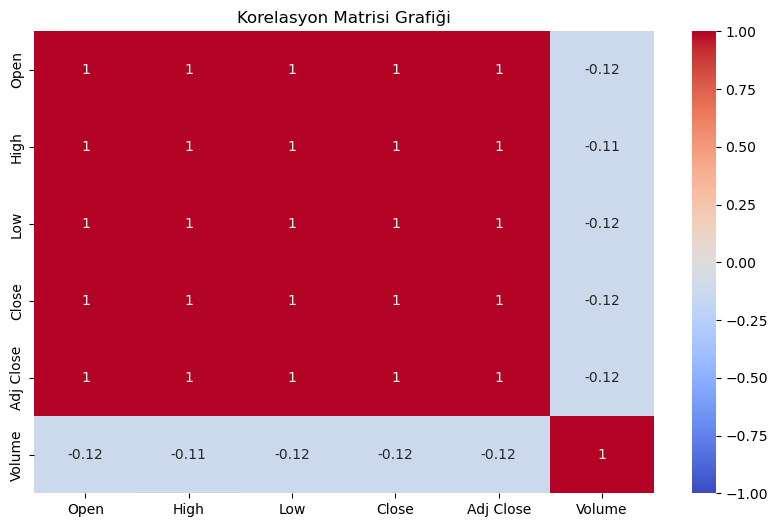

In [6]:
corr = df.corr()
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 6))
 
sns.heatmap(ax = ax, \
            data = corr, \
            annot = True, \
            cmap = "coolwarm", \
            vmin = -1, vmax= 1, center = 0)
 
ax.set_title("Korelasyon Matrisi Grafiği")
 
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [8]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state = 0)

In [10]:
X_train.shape[1]

5

In [11]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer ='adam',loss='binary_crossentropy')

model.fit(X_train,y_train, batch_size=10, epochs=50)


Epoch 1/50
262/262 [==============================] - 1s 920us/step - loss: 0.6009
Epoch 2/50
262/262 [==============================] - 0s 821us/step - loss: 0.4259
Epoch 3/50
262/262 [==============================] - 0s 778us/step - loss: 0.3883
Epoch 4/50
262/262 [==============================] - 0s 833us/step - loss: 0.3857
Epoch 5/50
262/262 [==============================] - 0s 814us/step - loss: 0.3855
Epoch 6/50
262/262 [==============================] - 0s 780us/step - loss: 0.3854
Epoch 7/50
262/262 [==============================] - 0s 790us/step - loss: 0.3854
Epoch 8/50
262/262 [==============================] - 0s 778us/step - loss: 0.3854
Epoch 9/50
262/262 [==============================] - 0s 778us/step - loss: 0.3854
Epoch 10/50
262/262 [==============================] - 0s 778us/step - loss: 0.3854
Epoch 11/50
262/262 [==============================] - 0s 778us/step - loss: 0.3854
Epoch 12/50
262/262 [==============================] - 0s 778us/step - loss: 0.3854
E

In [12]:
X_test = X_test.sort_index()

In [13]:
y_pred = model.predict(X_test)

21/21 [==============================] - 0s 470us/step


In [14]:
y_test = y_test.sort_index()

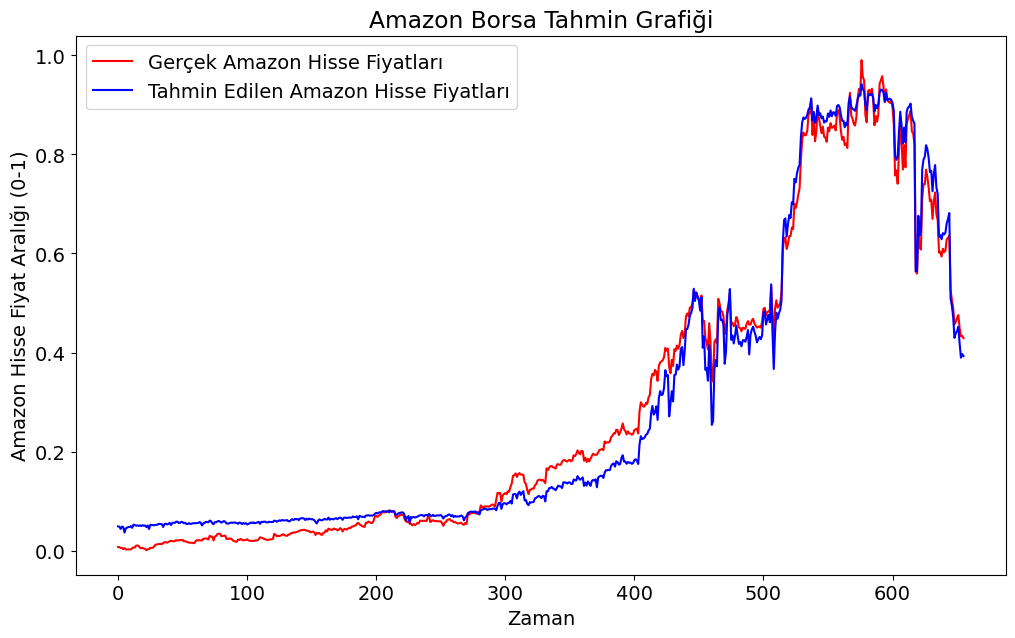

In [16]:
import matplotlib.pyplot as plt

predicted_stock_price = y_pred
actual_stock_price = y_test

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(np.arange(656),actual_stock_price, color="red", label="Gerçek Amazon Hisse Fiyatları")
plt.plot(np.arange(656),predicted_stock_price, color="blue", label="Tahmin Edilen Amazon Hisse Fiyatları")
plt.title("Amazon Borsa Tahmin Grafiği")
plt.xlabel("Zaman")
plt.ylabel("Amazon Hisse Fiyat Aralığı (0-1)")
plt.legend();